In [1]:
import pandas as pd
import joblib

# Récupération des données vectorisées à l'aide de TFIDF  dans la partie précédente.
X_train = joblib.load("X_train_final_tfidf.pkl")
y_train = joblib.load("y_train_final.pkl")
X_test = joblib.load("X_test_vec.pkl")
y_test = joblib.load("y_test.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [2]:
# Import pour les différents modèles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC

# Import Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Import pour les matrices de confusion
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création du dossier où enregistrer les modèles
import os
os.makedirs("Models", exist_ok=True)

In [3]:
# RANDOM FOREST CLASSIFIER

rf_model = RandomForestClassifier(n_estimators=100, random_state=25)
rf_model.fit(X_train, y_train)

# Prédiction
y_pred_rf = rf_model.predict(X_test)

# Rapport
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Score
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = report_rf["macro avg"]["f1-score"]

# Enregistrement du modèle
joblib.dump(rf_model, "Models/random_forest.pkl")
np.save("Predictions/y_pred_rf.npy", y_pred_rf)

Classification Report (Random Forest):
              precision    recall  f1-score   support

          10       0.35      0.68      0.46       623
          40       0.67      0.65      0.66       496
          50       0.82      0.73      0.77       329
          60       0.95      0.81      0.87       163
        1140       0.74      0.77      0.76       533
        1160       0.89      0.91      0.90       790
        1180       0.78      0.57      0.66       153
        1280       0.71      0.55      0.62       969
        1281       0.61      0.52      0.56       408
        1300       0.83      0.92      0.88      1001
        1301       0.95      0.93      0.94       139
        1302       0.86      0.74      0.80       475
        1320       0.80      0.77      0.78       645
        1560       0.78      0.81      0.79      1000
        1920       0.89      0.90      0.89       816
        1940       0.80      0.90      0.85       160
        2060       0.76      0.77      0.7

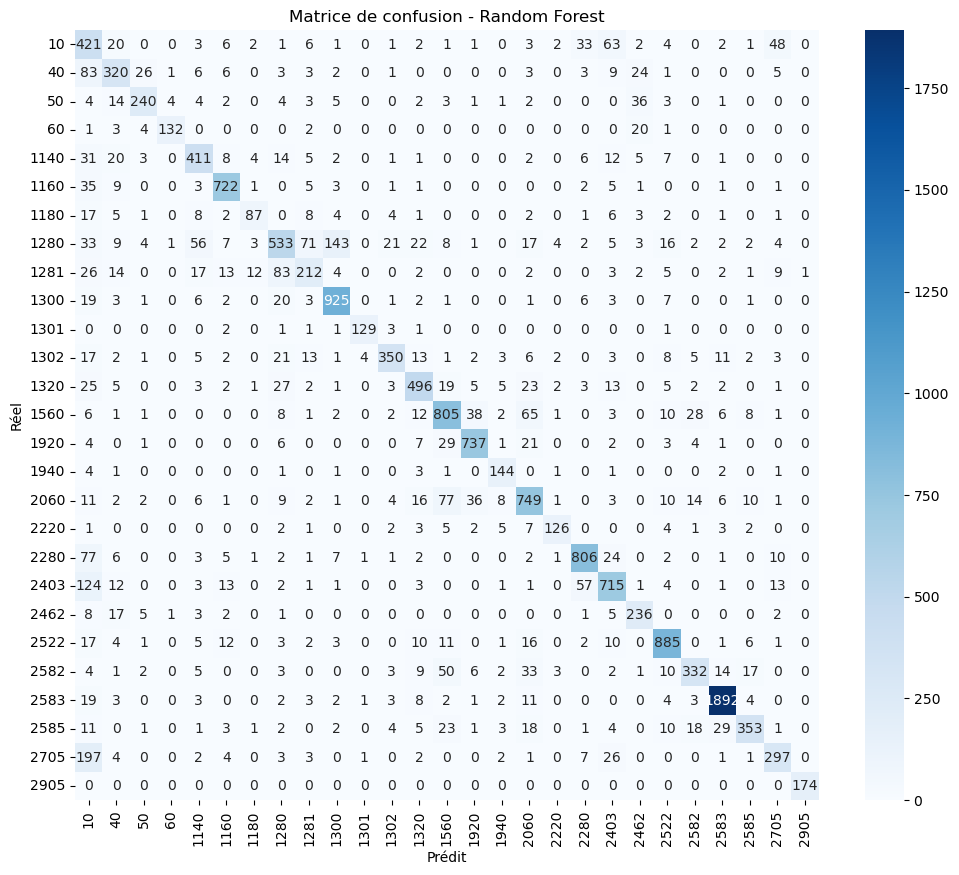

In [4]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Random Forest")
plt.show()